# **Problem Statment**

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

 2 --building_windows_non_float_processed

 3 --vehicle_windows_float_processed

 4 --vehicle_windows_non_float_processed (none in this database)

 5 --containers

 6 --tableware

 7 --headlamps







# **Importing Libraries**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [32]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [33]:
df=pd.read_csv('glass.csv')

In [34]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [35]:
df1 = df.copy()

In [36]:
df1.loc[df['Type'] == 1, 'Type'] = 'building_windows_float_processed'
df1.loc[df['Type'] == 2, 'Type'] = 'building_windows_non_float_processed'
df1.loc[df['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed'
df1.loc[df['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed'
df1.loc[df['Type'] == 5, 'Type'] = 'containers'
df1.loc[df['Type'] == 6, 'Type'] = 'tableware'
df1.loc[df['Type'] == 7, 'Type'] = 'headlamps'

In [37]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [38]:
df.shape

(214, 10)

# **Performing EDA**

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [40]:
df1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**AS we can see above there are no null values in our dataset.**

In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


<Axes: xlabel='Type', ylabel='count'>

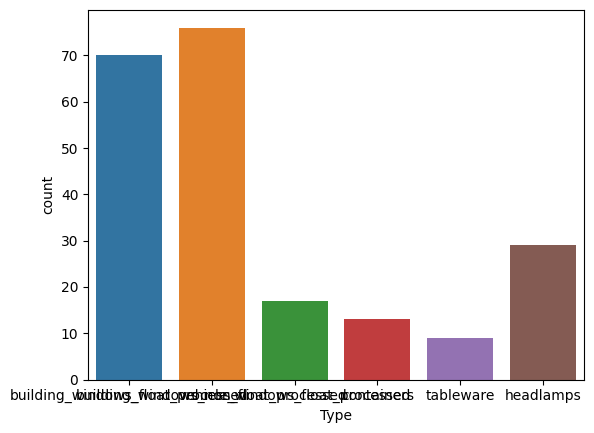

In [46]:
sns.countplot(x ='Type', data = df1)


**As shown in the above graph,the majority of the glass types are building_windows_float_processed and building_windows_non_float_processed.**

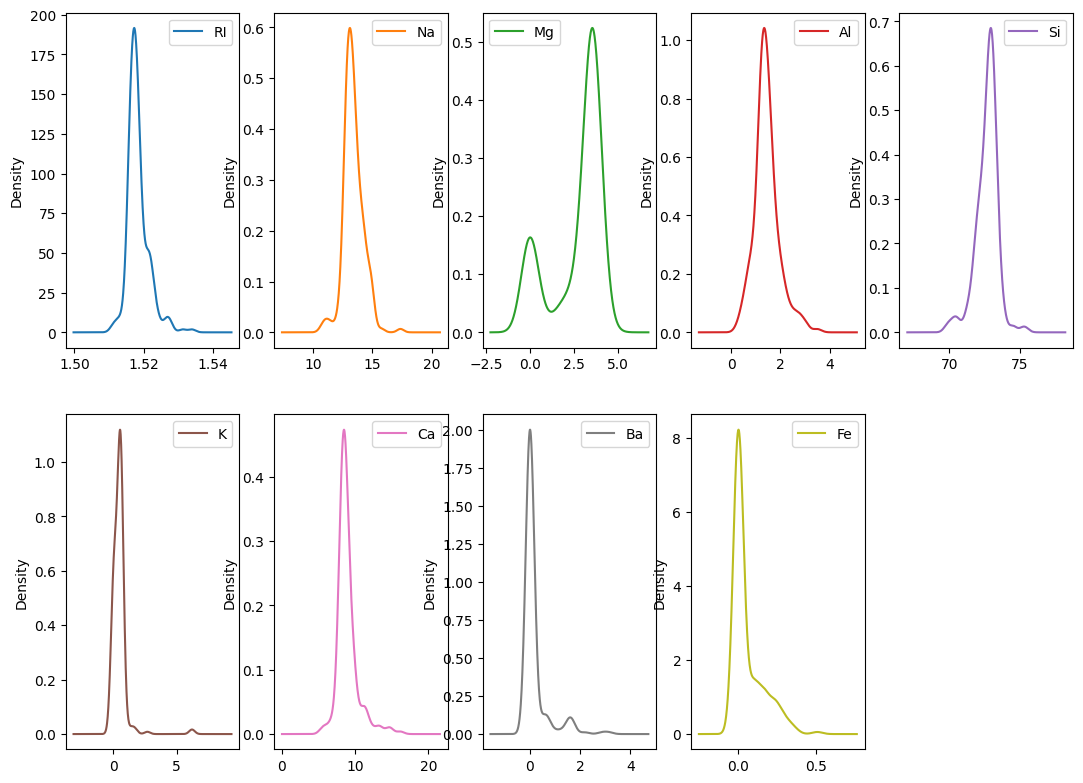

In [44]:
df1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

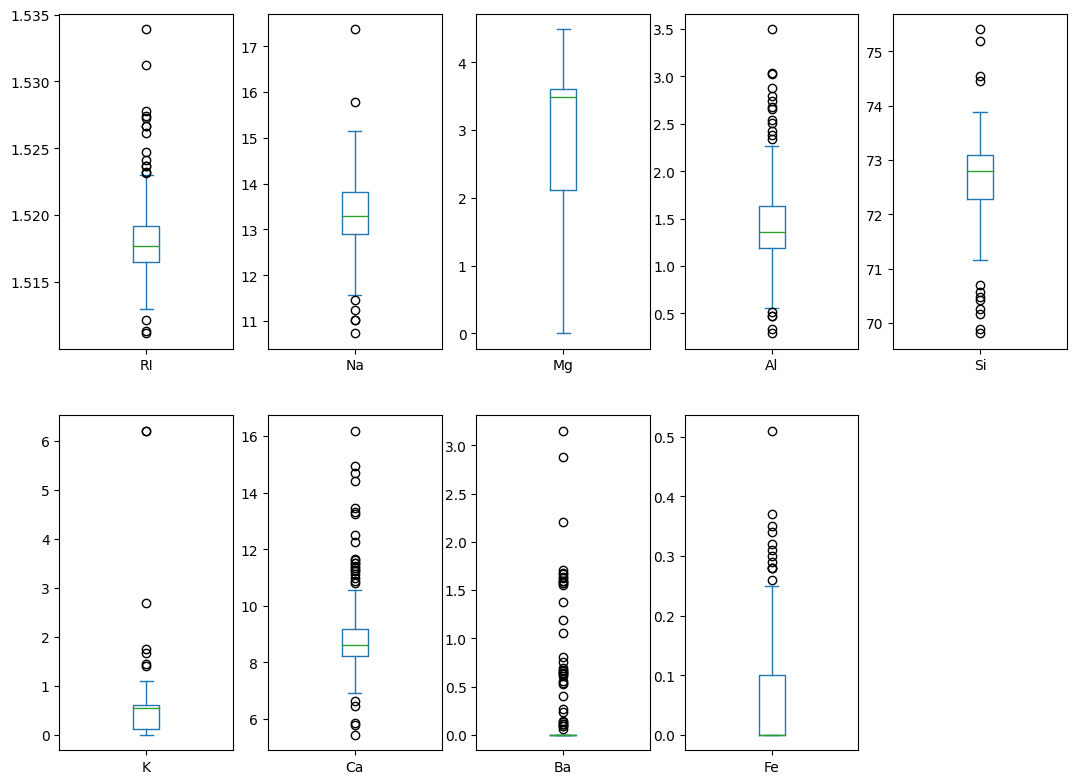

In [47]:
df1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

**Now  let's find the correlation between the features in the dataset**

In [48]:
cor = df1.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


# **Normalize the data**

In [115]:
DF= df.iloc[:,0:9]
array= DF.values


In [116]:
df_norm = StandardScaler().fit_transform(array) # normalizing the data

In [117]:
df_norm

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# **Splitting the data into Train and Test**

In [118]:
X = df_norm
y = np.array(df1['Type'])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# **Preparing a model : KNN Classifier**

In [120]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [121]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

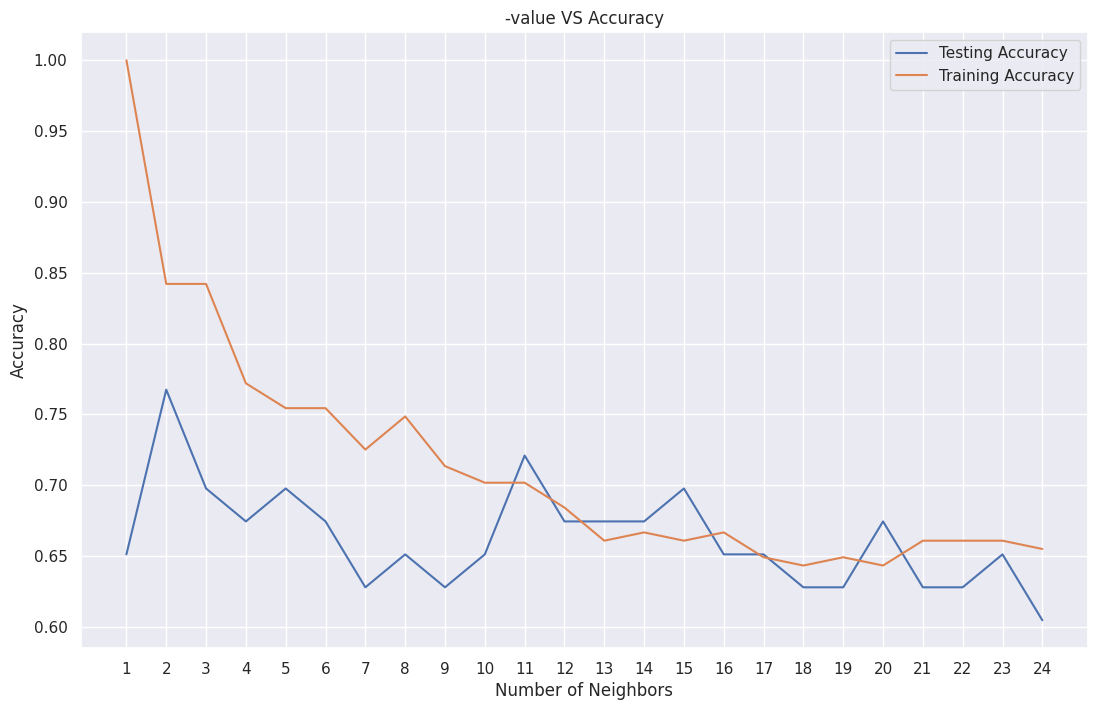

In [122]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

 **As we can see above that the k=2 gives us the best accuracy.So now lets build the model using k=2**

In [123]:
knn = KNeighborsClassifier(n_neighbors=2)

In [124]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [125]:
scores = []
cv_scores = []

In [126]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [127]:
score_knn=cross_val_score(knn, X,y, cv=10)

In [128]:
scores

[0.7674418604651163]

In [129]:
cv_score = score_knn.mean()
cv_scores.append(cv_score)
cv_scores

[0.6954545454545455]

**So as we can see above the cross validation Accuracy is 69.54% for k=2.**


**Now let's try to get the better accuracy by tunning the parameters.**

# **Hyperparameter Tunning for KNN Classifier by using Grid Search CV.**

In [130]:
model = KNeighborsClassifier()

In [131]:
n_neighbours = np.array(range(1,25))

In [132]:
grid = GridSearchCV(estimator=model,param_grid=dict(n_neighbors = n_neighbours))

In [133]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [134]:
grid.best_score_

0.7250420168067228

In [135]:
grid.best_params_

{'n_neighbors': 1}

**So as we can see above from the GridSearchCV we have got the best accuracy score which is 72.50% and the best value of k is 1.**

**Now lets use this values for our final model.**

# **Final Model**

In [136]:
final_knn = KNeighborsClassifier(n_neighbors=1)

In [137]:
final_knn.fit(X_train, y_train)
final_y_pred_KNeighborsClassifier = final_knn.predict(X_test)

In [138]:
score1 = accuracy_score(final_y_pred_KNeighborsClassifier,y_test)
score1

0.6511627906976745

In [139]:
score_knn1=cross_val_score(final_knn, X,y, cv=10)
score_knn1.mean()

0.6582251082251082

**So in our final model we hage got the best cross validation accuracy which is 65.82%**